 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_file = Path('Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_file, index_col='Date', parse_dates=True, infer_datetime_format=True)    
whale_df.info()
whale_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna().copy()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [49]:
# Reading algorithmic returns
algo_file = Path('Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_file, index_col='Date', parse_dates=True, infer_datetime_format=True)    
algo_df.info()
algo_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df = algo_df.dropna().copy()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [50]:
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
tsx60_file = Path('Resources/sp_tsx_history.csv')
tsx60_df = pd.read_csv(tsx60_file, index_col='Date', parse_dates=True, infer_datetime_format=True)    
tsx60_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
# Check Data Types
tsx60_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1818 non-null   object
dtypes: object(1)
memory usage: 28.4+ KB


In [11]:
# Fix Data Types
tsx60_df['Close'] = tsx60_df['Close'].astype('string')
tsx60_df['Close'] = tsx60_df['Close'].str.replace('$','')
tsx60_df['Close'] = tsx60_df['Close'].str.replace(',','')
tsx60_df['Close'] = tsx60_df['Close'].astype('float')

In [12]:
# Calculate Daily Returns
tsx60_df['Close'] = tsx60_df['Close'].pct_change()

In [13]:
# Drop nulls
tsx60_df = tsx60_df.dropna().copy()
tsx60_df.isnull().sum()

Close    0
dtype: int64

In [14]:
# Rename `Close` Column to be specific to this portfolio.
tsx60_df = tsx60_df.rename(columns={
    'Close': 'Tsx60'
})

In [15]:
tsx60_df.head()

,Tsx60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
total_daily = pd.concat([whale_df,algo_df,tsx60_df], axis=1, join='inner')
total_daily

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Tsx60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

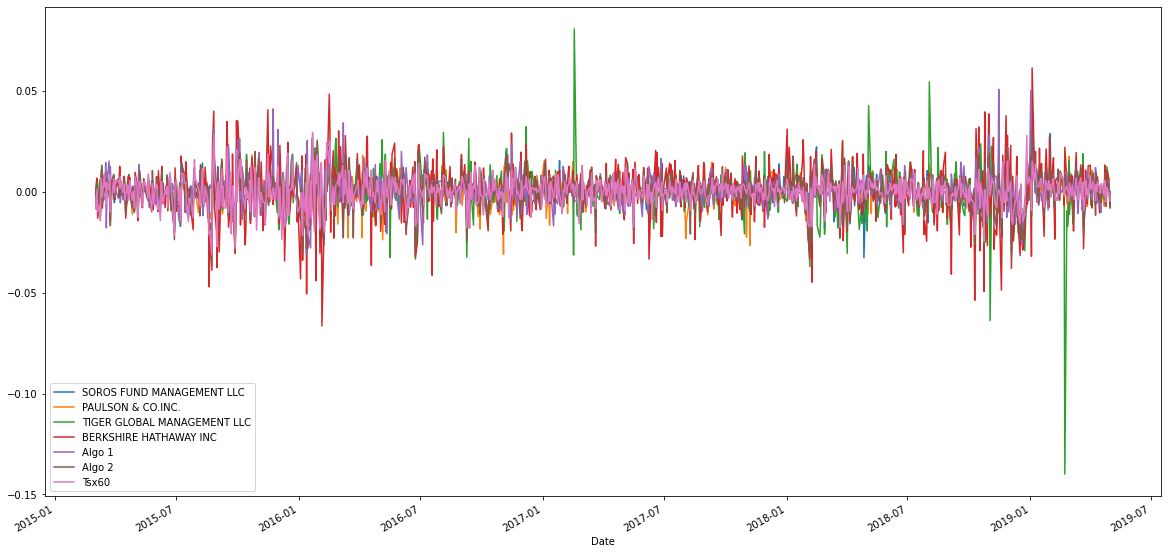

In [17]:
# Plot daily returns of all portfolios
total_daily.plot(figsize=[20,10])

#### Calculate and Plot cumulative returns.

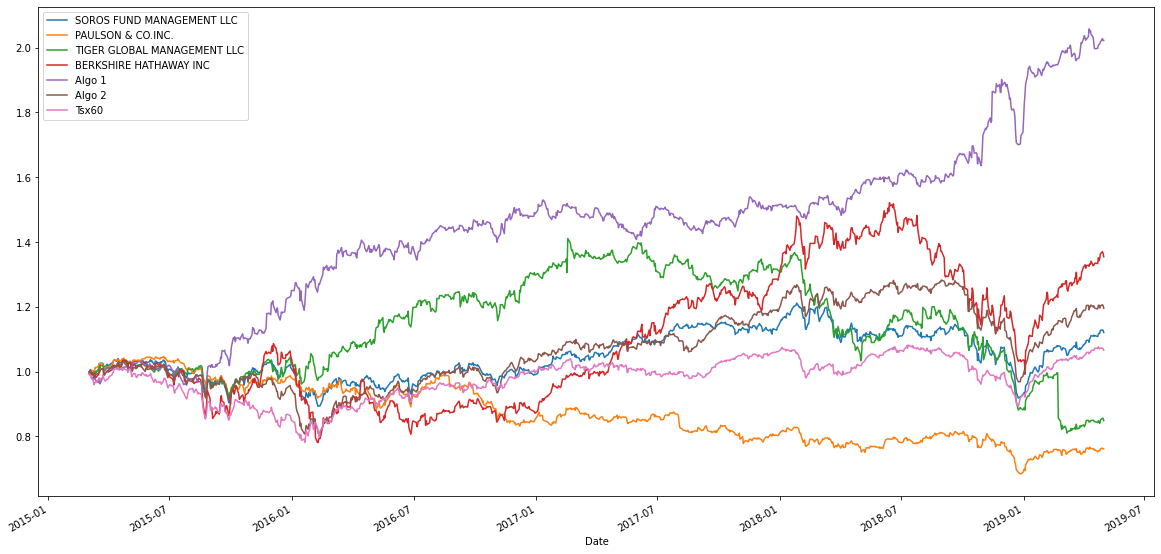

In [18]:
# Calculate cumulative returns of all portfolios
total_cumulative = (1 + total_daily).cumprod()
# Plot cumulative returns
total_cumulative.plot(figsize=[20,10])

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P TSX 60
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio

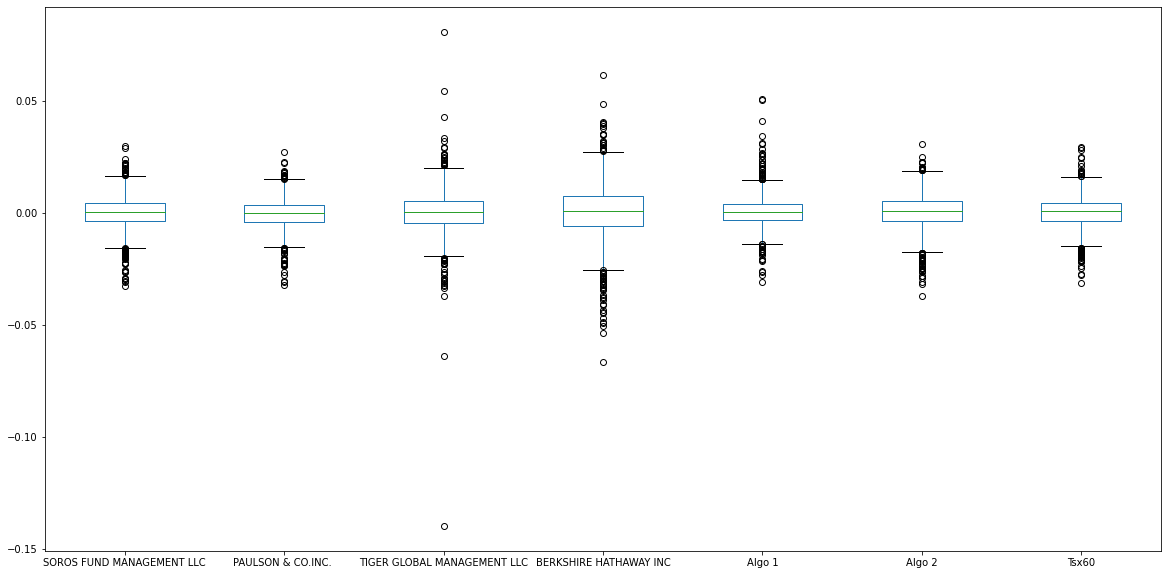

In [19]:
# Box plot to visually show risk
total_daily.plot.box(figsize=[20,10])

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
total_daily_std = total_daily.std()
total_daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
Tsx60                          0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [21]:
# Calculate the daily standard deviation of S&P TSX 60
tsx_60_std = tsx60_df.std()

In [22]:
# Determine which portfolios are riskier than the S&P TSX 60
total_daily_std = total_daily_std.sort_values(ascending=False)
total_daily_std > total_daily_std ['Tsx60']

BERKSHIRE HATHAWAY INC          True
TIGER GLOBAL MANAGEMENT LLC     True
Algo 2                          True
SOROS FUND MANAGEMENT LLC       True
Algo 1                          True
Tsx60                          False
PAULSON & CO.INC.              False
dtype: bool

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
total_aul_std = total_daily_std * np.sqrt(252)
total_aul_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
Tsx60                          0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60
3. Calculate and plot a 60-day Beta for Berkshire Hathaway Inc compared to the S&P 60 TSX

### Calculate and plot rolling `std` for all portfolios with 21-day window

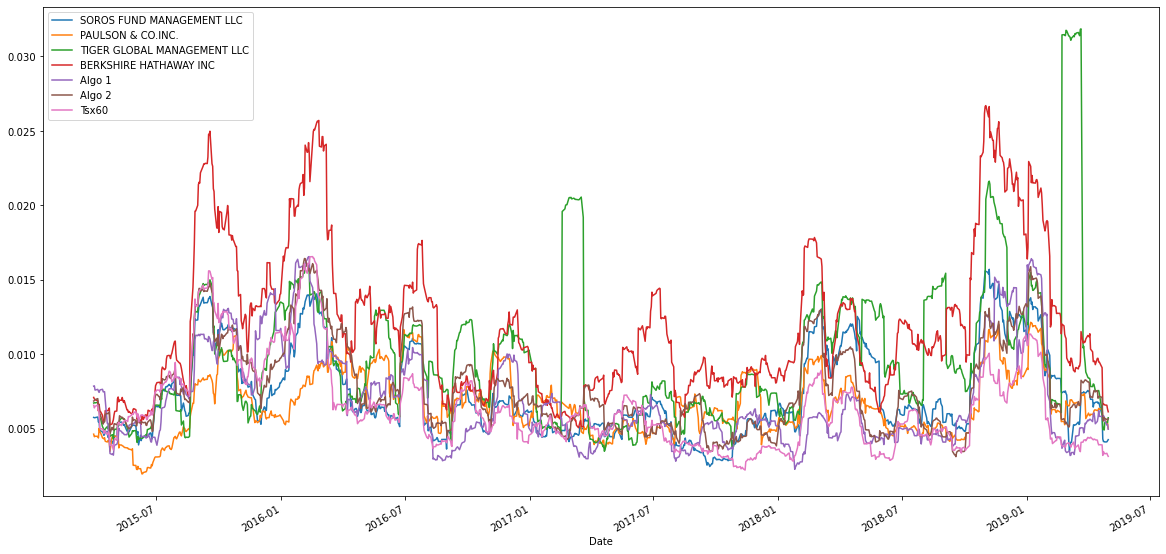

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
total_daily.rolling(window=21).std().plot(figsize=[20,10])
# Plot the rolling standard deviation

### Calculate and plot the correlation

In [25]:
# Calculate the correlation
corrolation = total_daily.corr()
# Display de correlation matrix
corrolation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Tsx60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
Tsx60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

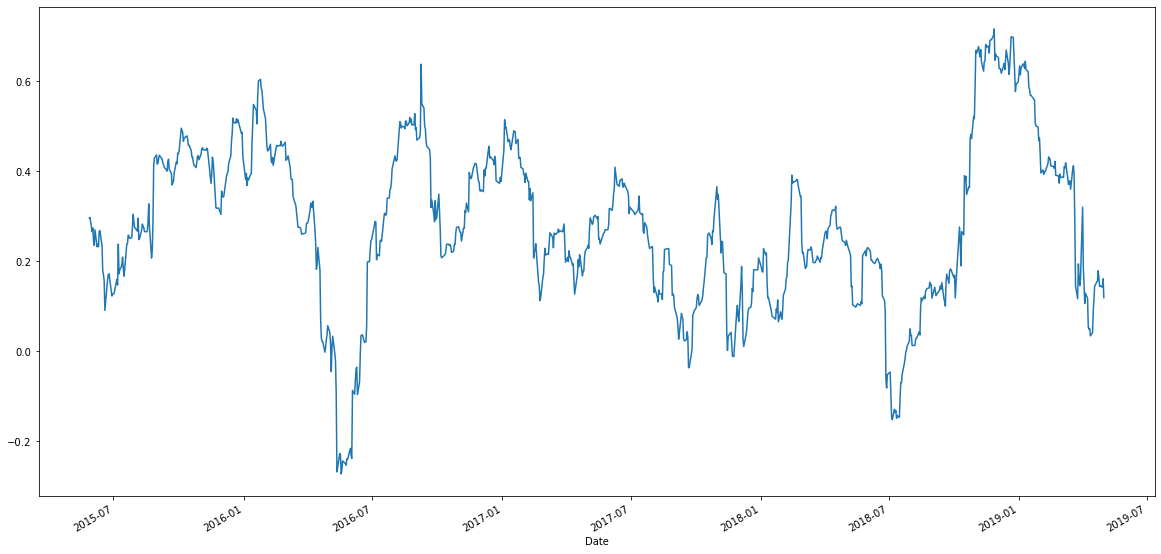

In [26]:
# Calculate covariance of a single portfolio
Algo1_cov = total_daily['Algo 1'].rolling(window=60).cov(total_daily["Tsx60"])
# Calculate variance of S&P TSX
Tsx60_var = total_daily['Tsx60'].rolling(window=60).var()
# Computing beta
Algo1_beta = Algo1_cov / Tsx60_var
# Plot beta trend
Algo1_beta.plot(figsize=[20,10])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

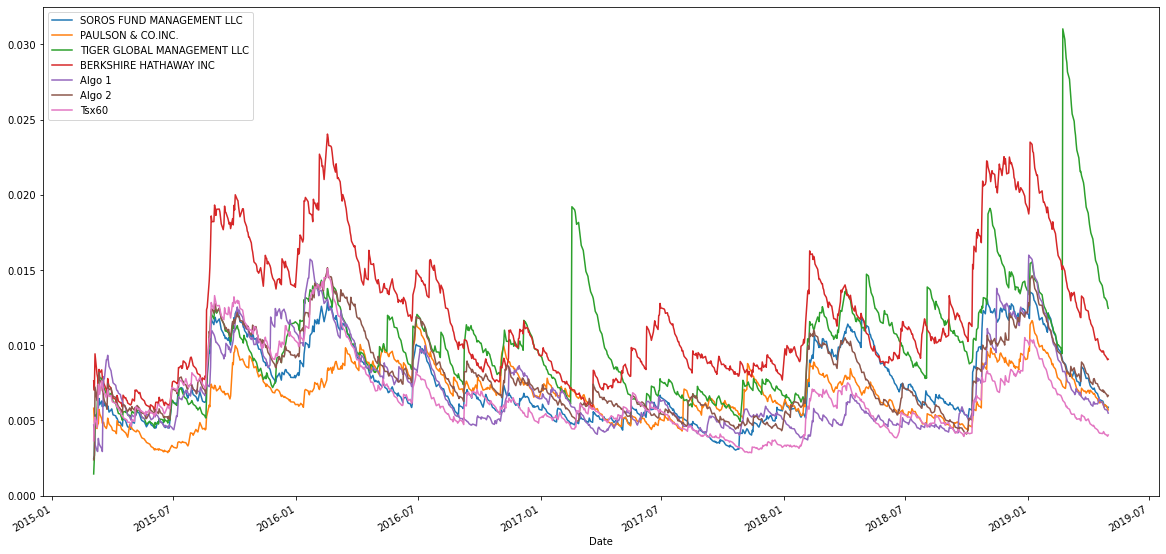

In [27]:
# Use `ewm` to calculate the rolling window
total_ewm = total_daily.ewm(21).std()
total_ewm.plot(figsize=[20,10])

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
total_sharpe = (total_daily.mean() * 252) / (total_daily.std() * np.sqrt(252))

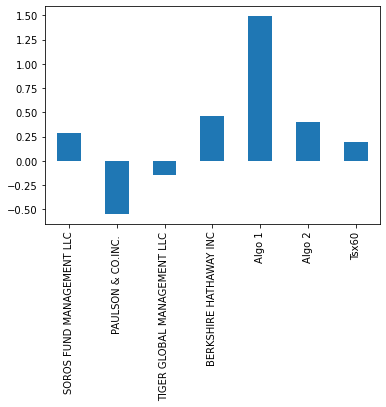

In [29]:
# Visualize the sharpe ratios as a bar plot
total_sharpe.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Both algorithmic stratagies provided better returns than the TSX60 with lower std deviation and lower risk. Algo 1 outproformed every other portfolio achiving signuficantly higher returns.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [30]:
# Reading data from 1st stock
shopify_file = Path('Resources/shop_historical.csv')
shop_df = pd.read_csv(shopify_file)
# shop_df = shop_df.rename(columns={
#     'Close': 'SHOP'
# })
shop_df.head()

,Symbol,Date,Close
0,SHOP,1/2/2018,132.06
1,SHOP,1/3/2018,135.15
2,SHOP,1/4/2018,137.46
3,SHOP,1/5/2018,137.26
4,SHOP,1/8/2018,139.51


In [31]:
# Reading data from 2nd stock
otex_file = Path('Resources/otex_historical.csv')
otex_df = pd.read_csv(otex_file)
# otex_df = otex_df.rename(columns={
#     'Close': 'OTEX'
# })
otex_df.head()

,Symbol,Date,Close
0,OTEX,1/2/2018,43.58
1,OTEX,1/3/2018,43.07
2,OTEX,1/4/2018,42.91
3,OTEX,1/5/2018,42.57
4,OTEX,1/8/2018,42.16


In [32]:
# Reading data from 3rd stock
lob_file = ('Resources/l_historical.csv')
lob_df = pd.read_csv(lob_file)
# lob_df = lob_df.rename(columns={
#     'Close': 'L'
# })
lob_df.head()

,Symbol,Date,Close
0,L,1/2/2018,57.99
1,L,1/3/2018,57.41
2,L,1/4/2018,57.42
3,L,1/5/2018,57.42
4,L,1/8/2018,56.86


In [33]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([shop_df, otex_df, lob_df], axis=1, join='inner')
combined_df.head()

,Symbol,Date,Close,Symbol,Date,Close,Symbol,Date,Close
0,SHOP,1/2/2018,132.06,OTEX,1/2/2018,43.58,L,1/2/2018,57.99
1,SHOP,1/3/2018,135.15,OTEX,1/3/2018,43.07,L,1/3/2018,57.41
2,SHOP,1/4/2018,137.46,OTEX,1/4/2018,42.91,L,1/4/2018,57.42
3,SHOP,1/5/2018,137.26,OTEX,1/5/2018,42.57,L,1/5/2018,57.42
4,SHOP,1/8/2018,139.51,OTEX,1/8/2018,42.16,L,1/8/2018,56.86


In [34]:
# Reset Date index
combined_df = combined_df.set_index(shop_df['Date'])
combined_df.head()

,Symbol,Date,Close,Symbol,Date,Close,Symbol,Date,Close
Date,,,,,,,,,
1/2/2018,SHOP,1/2/2018,132.06,OTEX,1/2/2018,43.58,L,1/2/2018,57.99
1/3/2018,SHOP,1/3/2018,135.15,OTEX,1/3/2018,43.07,L,1/3/2018,57.41
1/4/2018,SHOP,1/4/2018,137.46,OTEX,1/4/2018,42.91,L,1/4/2018,57.42
1/5/2018,SHOP,1/5/2018,137.26,OTEX,1/5/2018,42.57,L,1/5/2018,57.42
1/8/2018,SHOP,1/8/2018,139.51,OTEX,1/8/2018,42.16,L,1/8/2018,56.86


In [35]:
# Reorganize portfolio data by having a column per symbol
combined_df = combined_df.drop(columns=['Date'])
combined_df = combined_df.drop(columns=['Symbol'])
combined_df.columns = ['SHOP', 'OTEX', 'L']
combined_df

,SHOP,OTEX,L
Date,,,
1/2/2018,132.06,43.58,57.99
1/3/2018,135.15,43.07,57.41
1/4/2018,137.46,42.91,57.42
1/5/2018,137.26,42.57,57.42
1/8/2018,139.51,42.16,56.86
...,...,...,...
12/20/2019,513.22,58.68,67.90
12/23/2019,511.62,57.89,67.68
12/24/2019,525.39,57.44,67.67


In [36]:
combined_df.index

Index(['1/2/2018', '1/3/2018', '1/4/2018', '1/5/2018', '1/8/2018', '1/9/2018',
       '1/10/2018', '1/11/2018', '1/12/2018', '1/15/2018',
       ...
       '12/13/2019', '12/16/2019', '12/17/2019', '12/18/2019', '12/19/2019',
       '12/20/2019', '12/23/2019', '12/24/2019', '12/27/2019', '12/30/2019'],
      dtype='object', name='Date', length=501)

In [37]:
combined_df.index = pd.to_datetime(combined_df.index)

In [38]:
combined_df.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-15',
               ...
               '2019-12-13', '2019-12-16', '2019-12-17', '2019-12-18',
               '2019-12-19', '2019-12-20', '2019-12-23', '2019-12-24',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=501, freq=None)

In [39]:
# Calculate daily returns
combined_daily = combined_df.pct_change()
# Drop NAs
combined_daily = combined_daily.dropna().copy()
# Display sample data
combined_daily

,SHOP,OTEX,L
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969
...,...,...,...
2019-12-20,-0.005503,0.024441,0.003547
2019-12-23,-0.003118,-0.013463,-0.003240
2019-12-24,0.026915,-0.007773,-0.000148


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [40]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_ret = combined_daily.dot(weights)
portfolio_ret =pd.DataFrame(portfolio_ret, columns = ['MyPort'])
# Display sample data
portfolio_ret.head()

,MyPort
Date,
2018-01-03,0.000565
2018-01-04,0.004517
2018-01-05,-0.003126
2018-01-08,-0.000997
2018-01-09,-0.000999


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [41]:
# Join your returns DataFrame to the original returns DataFrame
joined_df = pd.concat([total_daily, portfolio_ret], axis=1, join='inner')
joined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Tsx60,MyPort
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


In [42]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
Tsx60                          0
MyPort                         0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [43]:
# Calculate the annualized `std`
joined_df_std = joined_df.std()
joined_aul_std = joined_df_std * np.sqrt(252)
joined_aul_std = joined_aul_std.sort_values(ascending=False)
joined_aul_std

BERKSHIRE HATHAWAY INC         0.227445
MyPort                         0.224346
TIGER GLOBAL MANAGEMENT LLC    0.219833
SOROS FUND MANAGEMENT LLC      0.145675
Algo 2                         0.137664
Algo 1                         0.120028
PAULSON & CO.INC.              0.114343
Tsx60                          0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

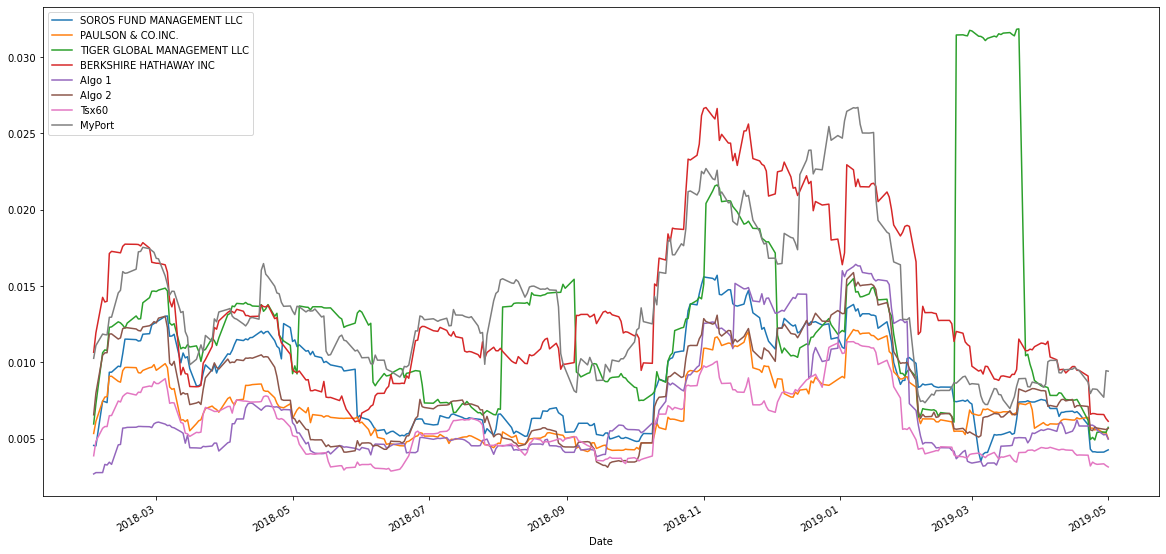

In [44]:
# Calculate rolling standard deviation
joined_df.rolling(window=21).std().plot(figsize=[20,10])
# Plot rolling standard deviation


### Calculate and plot the correlation

In [45]:
# Calculate and plot the correlation
joined_correlation = joined_df.corr()
joined_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Tsx60,MyPort
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.556093
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.385305
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.303971
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.647413
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.214770
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.563756
Tsx60,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.579228
MyPort,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228,1.000000


### Calculate and Plot Beta for Your Portfolio compared to the S&P 60 TSX

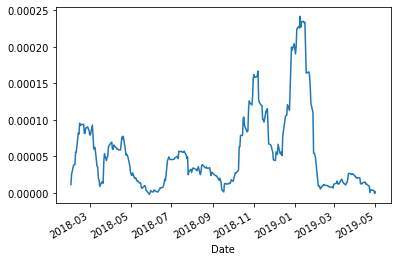

In [46]:
# Calculate and plot Beta
joined_cov = joined_df['MyPort'].rolling(window=21).cov(total_daily['Tsx60'])
combined_beta = joined_cov / Tsx60_var
joined_cov.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualzied Sharpe Ratios
joined_sharpe = (joined_df.mean() * 252) / (joined_df.std() * np.sqrt(252))

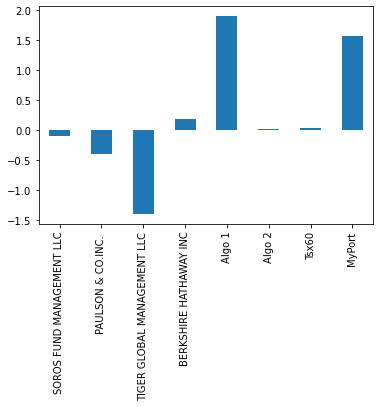

In [48]:
# Visualize the sharpe ratios as a bar plot
joined_sharpe.plot(kind='bar')

### How does your portfolio do?

My Portfolio does very well! Although still not as well as the algorithmic portfolio!